In [3]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import pandas as pd
import statsmodels as sm
import statsmodels.api 
import statsmodels.stats.api
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox
from pylab import *

In [4]:
customers = pd.read_excel('/Users/jenniferclontz/Downloads/Telco_customer_churn.xlsx')

In [5]:
customers.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [20]:
customers.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [7]:
pd.options.display.max_rows = None

In [8]:
pd.options.display.max_columns = None

In [9]:
customers.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [12]:
len(customers)

7043

In [13]:
len(customers.columns)

33

In [14]:
customers.Gender.value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [59]:
3488 / (3488 + 3555)

0.495243504188556

In [15]:
customers.Gender.describe()

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

In [21]:
customers.mean()

Count                  1.000000
Zip Code           93521.964646
Latitude              36.282441
Longitude           -119.798880
Tenure Months         32.371149
Monthly Charges       64.761692
Churn Value            0.265370
Churn Score           58.699418
CLTV                4400.295755
dtype: float64

In [19]:
customers.median()

Count                  1.000000
Zip Code           93552.000000
Latitude              36.391777
Longitude           -119.730885
Tenure Months         29.000000
Monthly Charges       70.350000
Churn Value            0.000000
Churn Score           61.000000
CLTV                4527.000000
dtype: float64

In [10]:
number_of_males = int(input('Enter the number of males: '))
number_of_females = int(input('Enter the number of females: '))

Enter the number of males: 150
Enter the number of females: 200


In [11]:
total_number_of_customers = number_of_females + number_of_males
percentage_of_males = number_of_males / total_number_of_customers
percentage_of_females = number_of_females / total_number_of_customers

In [12]:
print('Total number of males =', format(percentage_of_males, '0%'))
print('Total number of females =', format(percentage_of_females, '0%'))

Total number of males = 42.857143%
Total number of females = 57.142857%


In [28]:
import numpy as np
import seaborn as sns

In [49]:
customers.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [50]:
male_df = customers[customers['Gender']=="Male"]
female_df = customers[customers['Gender']=="Female"]

In [52]:
female_df.Gender.unique()

array(['Female'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='Churn Score'>

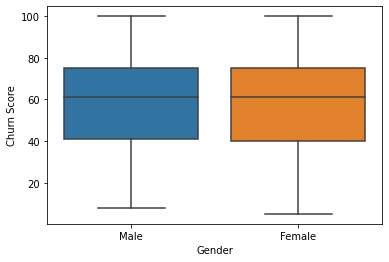

In [53]:
sns.boxplot(x="Gender", y="Churn Score", data = customers)

/Users/jenniferclontz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn Score'>

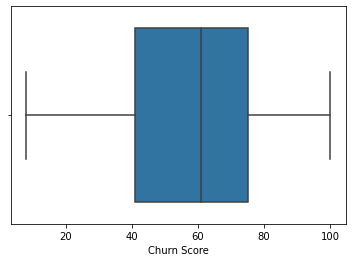

In [54]:
sns.boxplot(male_df['Churn Score'])

/Users/jenniferclontz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn Score'>

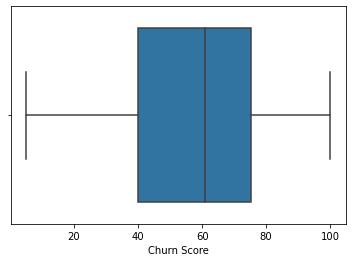

In [55]:
sns.boxplot(female_df['Churn Score'])

In [57]:
male_df["Churn Score"].describe()

count    3555.000000
mean       58.706048
std        21.362666
min         8.000000
25%        41.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

In [58]:
female_df["Churn Score"].describe()

count    3488.000000
mean       58.692661
std        21.692526
min         5.000000
25%        40.000000
50%        61.000000
75%        75.250000
max       100.000000
Name: Churn Score, dtype: float64

In [40]:
customers_tc_clean = customers[customers['Total Charges'] != '']

In [60]:
#customers_tc_clean['Total Charges'] = customers_tc_clean['Total Charges'].astype(float)#.apply(lambda v: float(v))

In [61]:
#sns.boxplot(x="Gender", y="Total Charges", data = customers)